## Introduction to Machine Learning  

## Assignment 7: Assessment and Measurements

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).

### Assignment Learning Goals:

By the end of the module, students are expected to:

- Explain why accuracy is not always the best metric in ML.
- Explain components of a confusion matrix.
- Define precision, recall, and f1-score and use them to evaluate different classifiers.
- Identify whether there is class imbalance and whether you need to deal with it.
- Explain `class_weight` and use it to deal with data imbalance.
- Appropriately select a scoring metric given a regression problem.
- Interpret and communicate the meanings of different scoring metrics on regression problems. MSE, RMSE, $R^2$, MAPE.
- Apply different scoring functions with `cross_validate` and `GridSearchCV` and `RandomizedSearchCV`.


This assignment covers [Module 7](https://ml-learn.mds.ubc.ca/en/module7) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [3]:
# Import libraries needed for this lab
from hashlib import sha1

import altair as alt
import graphviz
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import make_scorer
from sklearn.svm import SVC, SVR

import test_assignment7 as t
#alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# 1. Precision, recall, and f1 score "by hand" (without `sklearn`)


Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

##### Model A
|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


##### Model B
|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

**Question 1.1** <br> {points: 1}  

Precision, recall, and f1 score depend crucially upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class?

Save the label name in a string object named `answer_1_1`.

In [4]:
answer_1_1 = 'Actual disease'
answer_1_1

'Actual disease'

In [5]:
t.test_1_1(answer_1_1)

'Success'

**Question 1.2** <br> {points: 3}  

Calculate accuracies for Model A and Model B. 

Save the values of each calculations as a fraction in objects name `model_a_acc` and `model_b_acc` respectively. 

In [6]:
model_a_acc = (2+100)/(2+8+100)
model_b_acc = (6+90)/(6+4+10+90)
print(model_a_acc, model_b_acc)

0.9272727272727272 0.8727272727272727


In [7]:
t.test_1_2_1(model_a_acc)

'Success'

In [8]:
# check that the variable exists
assert 'model_b_acc' in globals(
), "Please make sure that your solution is named 'model_b_acc'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 1.3** <br> {points: 1}  

Which model would you pick simply based on the accuracy metric? 

Save either "Model A" or "Model B" in an object named `answer_1_3`.

In [9]:
answer_1_3 = 'Model A'

In [10]:
t.test_1_3(answer_1_3)

'Success'

**Question 1.4** <br> {points: 3}  

Calculate precision, recall, f1-score for **Model A** by designating the appropriate fraction to objects named `a_precision`, `a_recall` and `a_f1`. 

You can use the objects `a_precision` and `a_recall` to use in your `a_f1` calculation.

In [11]:
TP_A = 2
FP_A = 0
TN_A = 100
FN_A = 8

a_precision = TP_A/(TP_A+FP_A)
a_recall = TP_A/(TP_A+FN_A)
a_f1 = 2*((a_precision*a_recall)/(a_precision + a_recall))

print('a_precision: ', a_precision, '; ',
      'a_recall: ', a_recall, '; ', 
      'a_f1: ', a_f1)

a_precision:  1.0 ;  a_recall:  0.2 ;  a_f1:  0.33333333333333337


In [12]:
t.test_1_4_1(a_precision)

'Success'

In [13]:
t.test_1_4_2(a_recall)

'Success'

In [14]:
t.test_1_4_3(a_f1)

'Success'

**Question 1.5** <br> {points: 3}  

Calculate precision, recall, f1-score for **Model B** by designating the appropriate fraction to objects named `b_precision`, `b_recall` and `b_f1`. 

You can use the objects `b_precision` and `b_recall` to use in your `b_f1` calculation.

In [15]:
TP_B = 6
FP_B = 10
TN_B = 90
FN_B = 4

b_precision = TP_B/(TP_B+FP_B)
b_recall = TP_B/(TP_B+FN_B)
b_f1 = 2*((b_precision*b_recall)/(b_precision + b_recall))

print('b_precision: ', b_precision, '; ',
      'b_recall: ', b_recall, '; ', 
      'b_f1: ', b_f1)

b_precision:  0.375 ;  b_recall:  0.6 ;  b_f1:  0.4615384615384615


In [16]:
t.test_1_5_1(b_precision)

'Success'

In [17]:
t.test_1_5_2(b_recall)

'Success'

In [18]:
t.test_1_5_3(b_f1)

'Success'

**Question 1.6** <br> {points: 1}  

Which metric is more informative in this case?

i) Accuracy

ii) Precision

iii) Recall

iv) f1



Select all that apply and add them into a list named `answer_1_6`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_1_6 = ["i", "iv"] 
```


In [19]:
answer_1_6 = ['iii', 'iv']

In [20]:
t.test_1_6(answer_1_6)

'Success'

**Question 1.7** <br> {points: 1}  

Which model would you pick based on this information? 

Save either "Model A" or "Model B" in an object named `answer_1_7`.

In [21]:
answer_1_7 = 'Model B'

In [22]:
t.test_1_7(answer_1_7)

'Success'

# 2. Classification evaluation metrics using `sklearn`

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In the module material, we looked at a credit card fraud dataset which is a classic example of an imbalanced dataset. Another example is customer churn datasets. For the next questions, you will be using a [bank customer churn dataset](https://www.kaggle.com/shubh0799/churn-modelling) from Kaggle. In this question, we will be concentrating on the target label `Exited`. 

In [23]:
churn_df = pd.read_csv("data/churn.csv")
train_df, test_df = train_test_split(churn_df, test_size=0.3, random_state=123)
train_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04,0
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40,0
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01,0
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


**Question 2.1** <br> {points: 1}  

What is the distribution of target values (`Exited`) in the train split? Your answer should be of type Pandas Series and saved in an object named `class_dist`.

In [24]:
class_dist = train_df.groupby('Exited').size() 

In [25]:
t.test_2_1(class_dist)

'Success'

**Question 2.2** <br> {points: 1}  

Let's now separate our feature vectors from the target.

Use all the columns except for `Exited` as your `X` and the `Exited` column as your target `y`. 

You will need to split both `train_df` and `test_df`. 

Save the results in objects named `X_train`, `y_train`, `X_test` and `y_test`. 

In [26]:
X_train = train_df.drop(columns = 'Exited')
y_train = train_df['Exited']
X_test = test_df.drop(columns = 'Exited')
y_test = test_df['Exited']

X_train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14


In [27]:
t.test_2_2(X_train,X_test,y_train,y_test)

'Success'

**Question 2.3** <br> {points: 1} 

Carry out cross-validation with `DummyClassifier` using the `stratified` strategy. Pass the following `scoring` metrics to `cross_validate`. 
- accuracy
- f1
- recall
- precision

Make sure you use  `return_train_score=True` and 5-fold cross-validation.

Save your results in a dataframe named `dummy_scores`. 

In [28]:
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_clf.fit(X_train, y_train)
scoring = ['accuracy', 'f1', 'recall', 'precision']
dummy_scores = pd.DataFrame(cross_validate(dummy_clf, X_train, y_train, scoring = scoring, return_train_score = True))
dummy_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.002575,0.005969,0.677143,0.677679,0.228669,0.215558,0.234266,0.216405,0.223333,0.214719
1,0.001770,0.005603,0.665000,0.675000,0.181501,0.203850,0.181818,0.203316,0.181185,0.204386
2,0.001791,0.043717,0.662143,0.672857,0.188679,0.202091,0.192308,0.202443,0.185185,0.201739
3,0.001822,0.005492,0.682857,0.673929,0.201439,0.208153,0.195122,0.209607,0.208178,0.206718
4,0.001648,0.005428,0.667857,0.669107,0.194107,0.202325,0.195122,0.205240,0.193103,0.199491


In [29]:
t.test_2_3(dummy_scores)

'Success'

**Question 2.4** <br> {points: 1} 

What is the mean of each column in `dummy_scores`?


Save your result in an object named `dummy_mean`. 

In [30]:
dummy_mean = dummy_scores.mean()

In [31]:
t.test_2_4(dummy_mean)

'Success'

**Question 2.5** <br> {points: 5}  

Using either `.describe(include="all")`, `.info()` or looking at the data, split it into 4 types of features; numeric, categorical, binary and `drop_features`. 

- Add the labels of the numeric column(s) (as type string) to a list name `numeric_features`.
- Add the labels of the categorical column(s) (as type string) to a list name `categorical_features`.
- Add the labels of the binary column(s) (as type string) to a list name `binary_features`.
- Add the labels of the column that should be excluded from the model fitting to a list named `drop_features`. _(Hint: which of the columns is a unique identifier for the examples?)_

Identify different feature types (e.g., numeric, categorical, binary, drop features).
train_df.info()

In [103]:
list(churn_df)

['CustomerId',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [110]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography']
drop_features = ['CustomerId']
binary_features = ['Gender']

In [111]:
t.test_2_5_1(numeric_features)

'Success'

In [112]:
# check that the variable exists
assert 'categorical_features' in globals(
), "Please make sure that your solution is named 'categorical_features'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

In [113]:
t.test_2_5_3(drop_features)

'Success'

In [114]:
t.test_2_5_4(binary_features)

'Success'

Since we have no null values we can skip the individual pipelines and make our column transforming with just a single transformation. 

Because everyone needs a little help once in a while, we are going to do this part for you! 

In [115]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (OneHotEncoder(handle_unknown="error", drop="if_binary"), binary_features)
)

**Question 2.6** <br> {points: 2}  

In this question, you will be using the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) which you haven't studied yet but did see in assignment 3.  You should feel comfortable using models with our usual ML workflow even if you haven't seen them before. 


Build a pipeline named `unbalanced_pipe` that first preprocesses `preprocessor` and then builds a  `RandomForestClassifier` using a random_state of 77. 

Carry out cross-validation on `unbalanced_pipe` and the training set using the `cross_validate` function and the following evaluation metrics:
- `accuracy`
- `precision`
- `recall`
- `f1`

Note that you can pass multiple [scoring metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) as a list or a dict to the `scoring` parameter. 

Save the results of the cross-validation in a dataframe named`rf_unbalanced_scores`.

In [119]:
unbalanced_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state = 77))
unbalanced_pipe.fit(X_train, y_train)
scoring = ['accuracy','f1','recall','precision']
cv = cross_validate(unbalanced_pipe, X_train, y_train, cv = 5, scoring = scoring, return_train_score = True)
rf_unbalanced_scores = pd.DataFrame(cv)

In [120]:
t.test_2_6(rf_unbalanced_scores)

'Success'

**Question 2.7** <br> {points: 1} 

What is the mean of each column in `rf_unbalanced_scores`?


Save your result in an object named `rf_unbalanced_mean`. 

In [132]:
rf_unbalanced_mean = rf_unbalanced_scores.mean()
rf_unbalanced_mean

fit_time           0.838242
score_time         0.052098
test_accuracy      0.857143
train_accuracy     1.000000
test_f1            0.559844
train_f1           1.000000
test_recall        0.444811
train_recall       1.000000
test_precision     0.758343
train_precision    1.000000
dtype: float64

In [124]:
t.test_2_7(rf_unbalanced_mean)

'Success'

**Question 2.8** <br> {points: 2}  

Repeat question 6 above but this time set `class_weight="balanced"` in the `RandomForestClassifier`. 
Save the new pipeline in an object named `balanced_pipe`. Don't forget to use `random_state=77`for the classifier. 

Carry out cross-validation on `balanced_pipe` but this time save the scores in a dataframe named `rf_balanced_scores`.

In [125]:
unbalanced_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state = 77, class_weight = 'balanced'))
unbalanced_pipe.fit(X_train, y_train)
scoring = ['accuracy','f1','recall','precision']
cv = cross_validate(unbalanced_pipe, X_train, y_train, cv = 5, scoring = scoring, return_train_score = True)
rf_balanced_scores = pd.DataFrame(cv)

In [126]:
t.test_2_8(rf_balanced_scores)

'Success'

**Question 2.9** <br> {points: 1} 

What is the mean of each column in `rf_balanced_scores`?


Save your result in an object named `rf_balanced_mean`. 

In [131]:
rf_balanced_mean = rf_balanced_scores.mean()
rf_balanced_mean

fit_time           1.038541
score_time         0.072518
test_accuracy      0.857714
train_accuracy     1.000000
test_f1            0.550549
train_f1           1.000000
test_recall        0.428038
train_recall       1.000000
test_precision     0.775329
train_precision    1.000000
dtype: float64

In [128]:
t.test_2_9(rf_balanced_mean)

'Success'

**Question 2.10** <br> {points: 1} 

Look at your results above. Which of the following statements are true? 

i) Both random forest models have better mean validation accuracy performance than the dummy classifier.

ii) The balanced class random forest model has a better mean validation recall score than the unbalanced random forest model. 

iii) The balanced class random forest model has a better mean validation precision score than the unbalanced random forest model.  

iv) Mean validation precision and recall scores only increased in the balanced class random forest model.

v) Both random forest models show higher validation precision scores than validation recall scores. 


Select all that apply and add them into a list named `answer_2_10`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_2_10 = ["i", "iv"] 
```


In [138]:
answer_2_10 = ['i','iii','v']

In [139]:
t.test_2_10(answer_2_10)

'Success'

**Question 2.11** <br> {points: 1} 

For this next question, we have given you the majority of the code to hyperparameter tune the balanced `RandomForestClassifier`. 

Copy and paste the contents of the cell below into the following cell where the solution should be. Fill in the `....` blanks below so that it executes and returns the output. 

In [143]:
import scipy
from scipy.stats import randint

rf_pipeline = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight='balanced', random_state=123)
)

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),
}

random_search = RandomizedSearchCV(
    rf_pipeline,
    param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="f1",
    random_state=123,
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['CustomerId']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                '

In [144]:
t.test_2_11(rf_pipeline, random_search)

'Success'

**Question 2.12** <br> {points: 3}

What are the best hyperparameter value for `n_estimators` and `max_depth`. Save it in an object named `optimal_parameters` (The auto-grader is expecting a dictionary object). 

What was the corresponding validation score? Save this in an object named `optimal_score`. 

*Hint: `.best_params_`  and `.best_score_` are helpful here.* 


In [157]:
optimal_parameters = random_search.best_params_
optimal_score = random_search.best_score_

In [158]:
t. test_2_12_1(random_search, optimal_parameters)

'Success'

In [159]:
# check that the variable exists
assert 'optimal_score' in globals(
), "Please make sure that your solution is named 'optimal_score'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 2.13** <br> {points: 2} 

What is the train and test score of the best scoring model? Save the result in objects named `training_score`, and `testing_score` respectively.

In [161]:
training_score = random_search.score(X_train, y_train)
testing_score = random_search.score(X_test, y_test)

In [162]:
t.test_2_13_1(random_search, training_score, X_train, y_train)

'Success'

In [163]:
t.test_2_13_2(random_search, testing_score, X_test, y_test)

'Success'

**Question 2.14** <br> {points: 0} 

Import the appropriate libraries to plot a confusion matrix and print a classification report. 

In [166]:
from sklearn.metrics import  plot_confusion_matrix

In [167]:
t.test_2_14()

'Success'

**Question 2.15** <br> {points: 1} 


Plot a confusion matrix on the test set using the object `random_search` as your estimator and "normalize" all your results (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) for more help here).

Name the plot `cm_plot`. 

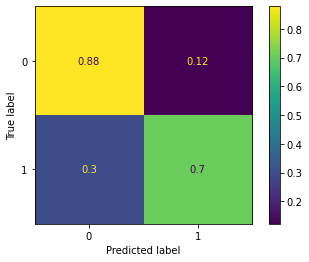

In [175]:
cm_plot = plot_confusion_matrix(random_search, X_test, y_test, normalize = 'true')

In [176]:
t.test_2_15(cm_plot)

'Success'

**Question 2.16** <br> {points: 3} 

Below print a classification report on the `X_test` predictions of `random_search`'s best model. Use this information to answer the questions below.

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search.predict(X_test), target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.92      0.88      0.90      2395
    positive       0.59      0.70      0.64       605

    accuracy                           0.84      3000
   macro avg       0.76      0.79      0.77      3000
weighted avg       0.86      0.84      0.85      3000





A) What is the recall considering that `Exited`(=1) is our "positive" class? Save the result to two decimal places in an object named `answer2_16a`. 

B) What is the precision weighted average? Save the result to two decimal places in an object named `answer2_16b`. 

C) How many customers exited in this test set? Save the result as an integer in an object named `answer2_16c`.

In [187]:
answer2_16a = 0.70
answer2_16b = 0.86
answer2_16c = 605

In [188]:
t.test_2_16_1(answer2_16a)

'Success'

In [189]:
t.test_2_16_2(answer2_16b)

'Success'

In [190]:
t.test_2_16_3(answer2_16c)

'Success'

**Question 2.17** <br> {points: 1} 

What's happened to our model since we have tuned our hyperparameters?

A) We have sacrificed some of our precision score for a better recall score.

B) Our accuracy has decreased.

C) We have likely increased the number of falsely identified exited customers.

D) All of the above.

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer2_17`.*

In [191]:
answer2_17 = 'D'

In [192]:
t.test_2_17(answer2_17)

'Success'

# 3. Regression Metrics

For this exercise, we will bring back the [Taiwan real estate valuation dataset](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) that we saw in assignment 1. 

We are doing the first part for you. 

In [193]:
housing_df = pd.read_csv('data/real_estate.csv')
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)
train_df.head()

,house_age,distance_station,num_stores,latitude,longitude,price
82,13.2,150.9347,7,24.96725,121.54252,48.1
307,10.3,3079.8900,0,24.95460,121.56627,24.7
267,34.7,482.7581,5,24.97433,121.53863,41.1
310,16.4,1643.4990,2,24.95394,121.55174,24.7
203,15.6,289.3248,5,24.98203,121.54348,46.1


In [197]:
X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

**Question 3.1** <br> {points: 1}  

Since we have seen this dataset already, we know there are only numeric features and no missing values so we can skip quite a few steps here. 

Make a single pipeline using `make_pipeline` named `reg_pipe` that first uses `StandardScaler()`.


In [201]:
reg_pipe = make_pipeline(StandardScaler(), SVR())

In [202]:
t.test_3_1(reg_pipe)

'Success'

**Question 3.2** <br> {points: 1}  

Given the MAPE function we have given below, create a scorer function that we can pass into cross-validation. (look [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html?highlight=make_scorer#sklearn.metrics.make_scorer) for help). 

Save it in an object named `mape_scorer`. Remember that MAPE is an error measure so we must use `greater_is_better=False` as an argument. 


In [205]:
from sklearn.metrics import make_scorer

def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))
mape_scorer = make_scorer(mape, greater_is_better = False)

In [206]:
t.test_3_2(mape_scorer)

'Success'

**Question 3.3** <br> {points: 1}  

Make a dictionary named `scoring_dict` consisting the following metrics: 

- `neg_mean_squared_error`
- `neg_root_mean_square_error`
- `neg_mean_absolute_error`
- `r2`
- `mape_scorer`

The key-value pairs in this dictionary should be identical. (Aka the item to the left of the colon is the same as the right side of the colon - we have started it for you just in case.)

Remember that `mape_scorer` is a variable and should **NOT** be called as a string. (Although we need to name it as a string value for the dictionary's key; See slide 6 of exercise 21 for help.)

In [218]:
scoring_dict = {"neg_mean_squared_error": "neg_mean_squared_error",
                "neg_root_mean_square_error" : "neg_root_mean_squared_error",
                "neg_mean_absolute_error" : "neg_mean_absolute_error",
                "r2" : "r2",
                "mape_scorer" : mape_scorer
               }

In [219]:
t.test_3_3(scoring_dict)

'Success'

**Question 3.4** <br> {points: 1}  

Carry out cross-validation on `reg_pipe` and the training set using the `cross_validate` function.

Make sure to set `return_train_score=True` and assign our `scoring_dict` to the `scoring` argument.


Save the results of the cross-validation in a dataframe named `regression_scores`.

In [224]:
regression_scores = pd.DataFrame(cross_validate(reg_pipe, X_train, y_train, return_train_score = True, scoring = scoring_dict))

In [225]:
t.test_3_4(regression_scores)

'Success'

**Question 3.5** <br> {points: 1} 

What is the mean of each column in `regression_scores`?


Save your result in an object named `regression_mean`. 

In [226]:
regression_mean = regression_scores.mean()

In [227]:
t.test_3_5(regression_mean)

'Success'

**Question 3.6** <br> {points: 2} 

What is the model's mean validation MAPE score? 

Save your answer to 2 decimal places in an object named `mean_reg_mape`. 

In [230]:
mean_reg_mape = -16.77

In [231]:
# check that the variable exists
assert 'mean_reg_mape' in globals(
), "Please make sure that your solution is named 'mean_reg_mape'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## Attributions
- The Bank Customer Churn DataSet - [Kaggle](https://www.kaggle.com/shubh0799/churn-modelling)

- Real Estate Dataset - [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

*Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*


- MDS DSCI 573 - Feature & Model Selection  - [MDS's GitHub website](https://github.com/UBC-MDS/DSCI_573_feat-model-select) 


## Before Submitting 

Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  